
#***About this dataset***

    Age : Age of the patient
    Sex : Sex of the patient
    exang: exercise induced angina (1 = yes; 0 = no)
    ca: number of major vessels 
    cp : Chest Pain type chest pain type
        Value 0: typical angina
        Value 1: atypical angina
        Value 2: non-anginal pain
        Value 3: asymptomatic
    trtbps : resting blood pressure (in mm Hg)
    chol : cholestoral in mg/dl fetched via BMI sensor
    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by   Estes' criteria
    thalach : maximum heart rate achieved
    target : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#***data***

In [6]:
path = "/content/heart.csv"
data = pd.read_csv(path)
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
data.shape

(303, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
for col in data.columns :
  print("**********************************************************************")
  print(f"********************************{col}********************************")
  print("**********************************************************************")

  print(f"data types  :  \n{data[col].unique()}")
  print("-------------------------------------")
  print(f"unique data :  \n{data[col].nunique()}")
  print("-------------------------------------")
  print(f"distribution of values :  \n{data[col].value_counts()}")
  print("-------------------------------------")


  print('\n\n')

**********************************************************************
********************************age********************************
**********************************************************************
data types  :  
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
-------------------------------------
unique data :  
41
-------------------------------------
distribution of values :  
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64
-------------------------------------



**********************************************************************
*********************

In [12]:
cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
con_cols = ['age','trtbps', 'chol','thalachh','oldpeak']
cat_cols = ['sex', 'cp','fbs','restecg','exng','slp', 'caa','thall']
terget_col = ['output']

#***plotting***

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)


##### bar plot(categorical columns)

********************************************************************************




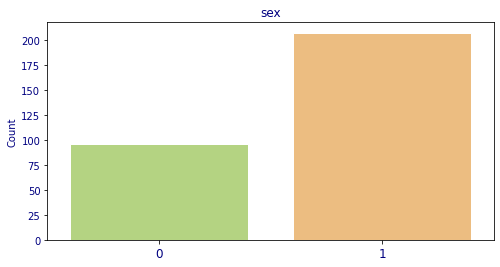




********************************************************************************




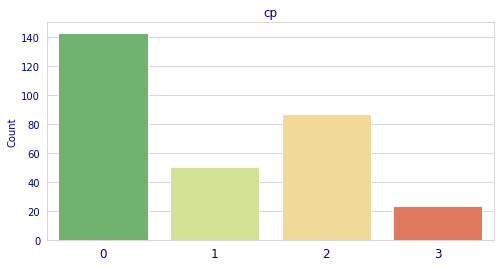




********************************************************************************




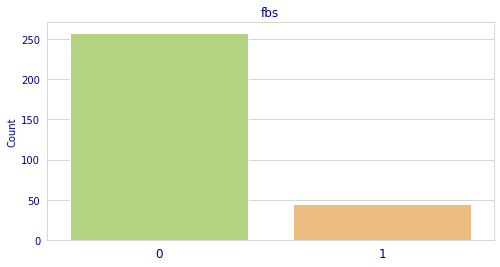




********************************************************************************




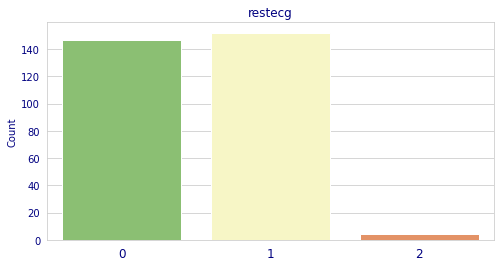




********************************************************************************




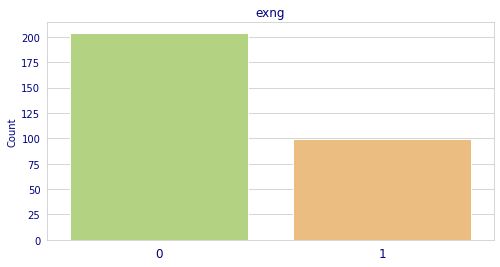




********************************************************************************




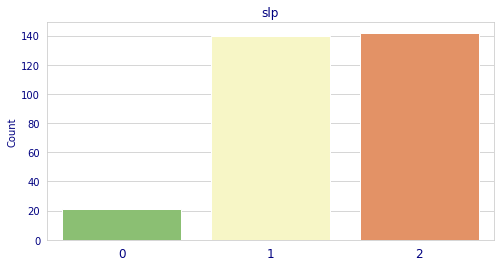




********************************************************************************




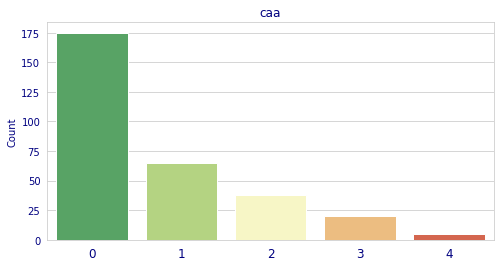




********************************************************************************




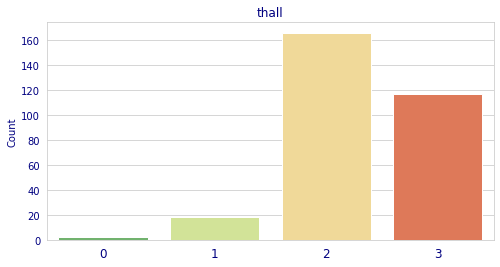

In [14]:
for col in cat_cols :
  print("*"*80)
  print('\n')
  fig=plt.subplots(figsize=(8,4))
  sns.set_style("whitegrid")
  sns.countplot(data[col] , palette='RdYlGn_r')
  plt.title(col , color='navy')
  plt.xticks(rotation=0 , size=12, color='navy')
  plt.yticks(color='navy')
  plt.ylabel('Count',color='navy')
  plt.xlabel(xlabel=None)
  plt.show()
  print("\n\n")



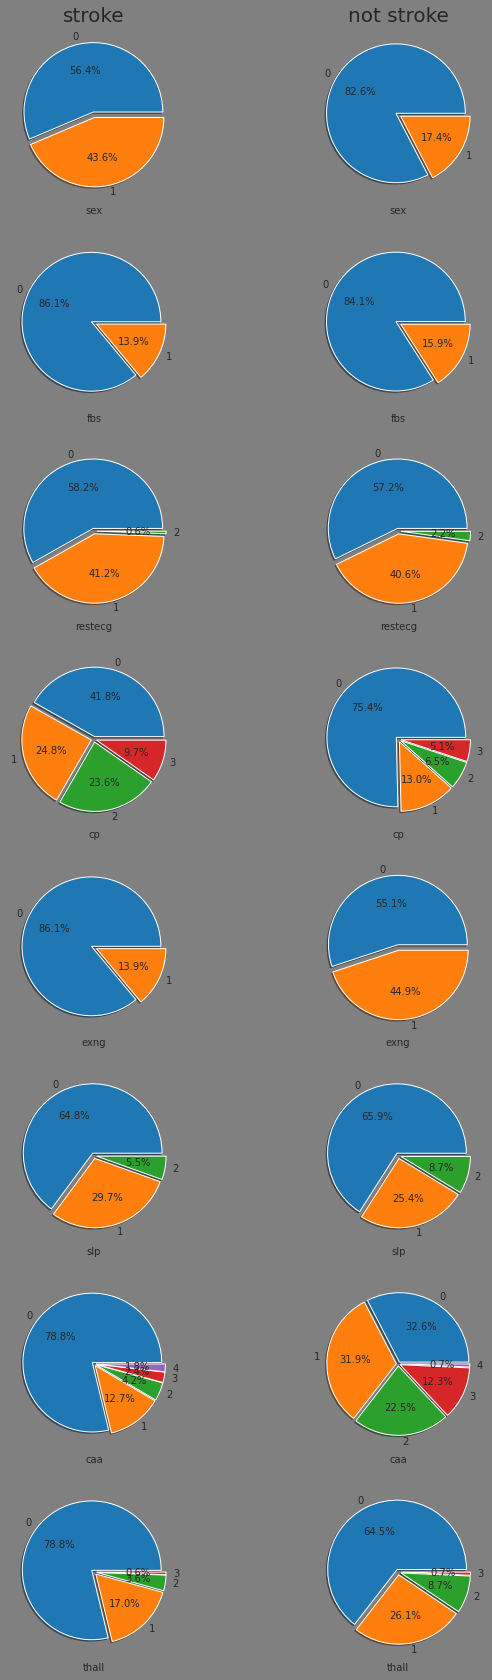

In [15]:

sex_1 = data[data['output'] == 1].sex.value_counts()
sex_0 = data[data['output'] == 0].sex.value_counts()

fbs_1 = data[data['output'] == 1].fbs.value_counts()
fbs_0 = data[data['output'] == 0].fbs.value_counts()

restecg_1 = data[data['output'] == 1].restecg.value_counts()
restecg_0 = data[data['output'] == 0].restecg.value_counts()

cp_1 = data[data['output'] == 1].cp.value_counts()
cp_0 = data[data['output'] == 0].cp.value_counts()

exng_1 = data[data['output'] == 1].exng.value_counts()
exng_0 = data[data['output'] == 0].exng.value_counts()

slp_1 = data[data['output'] == 1].slp.value_counts()
slp_0 = data[data['output'] == 0].slp.value_counts()

caa_1 = data[data['output'] == 1].caa.value_counts()
caa_0 = data[data['output'] == 0].caa.value_counts()

thall_1 = data[data['output'] == 1].thall.value_counts()
thall_0 = data[data['output'] == 0].thall.value_counts()


figg , axx = plt.subplots(nrows=8 , ncols=2 , figsize=(10,30) , facecolor='gray')

axx[0][0].pie(sex_1 ,autopct = '%1.1f%%' ,explode = [0.04,0.04],labels=[0,1] , shadow=True )
axx[0][1].pie(sex_0 ,autopct = '%1.1f%%' ,explode = [0.04,0.04],labels=[0,1] , shadow=True )

axx[1][0].pie(fbs_1 , autopct = '%1.1f%%' ,explode = [0.04,0.04],labels=[0,1] , shadow=True )
axx[1][1].pie(fbs_0 , autopct = '%1.1f%%' ,explode = [0.04,0.04],labels=[0,1] , shadow=True )

axx[2][0].pie(restecg_1 , autopct = '%1.1f%%' ,explode = [0.04,0.04,0.04],labels=[0,1,2] , shadow=True )
axx[2][1].pie(restecg_0 , autopct = '%1.1f%%' ,explode = [0.04,0.04,0.04],labels=[0,1,2] , shadow=True )

axx[3][0].pie(cp_1  , autopct = '%1.1f%%' ,explode = [0.04,0.04,0.04,0.04],labels=[0,1,2,3] , shadow=True )
axx[3][1].pie(cp_0  , autopct = '%1.1f%%' ,explode = [0.04,0.04,0.04,0.04],labels=[0,1,2,3]  , shadow=True )

axx[4][0].pie(exng_1 , autopct = '%1.1f%%' ,explode = [0.04,0.04],labels=[0,1] , shadow=True )
axx[4][1].pie(exng_0 , autopct = '%1.1f%%' ,explode = [0.04,0.04],labels=[0,1] , shadow=True )

axx[5][0].pie(slp_1, autopct = '%1.1f%%' ,explode = [0.04,0.04,0.04],labels=[0,1,2] , shadow=True )
axx[5][1].pie(slp_0, autopct = '%1.1f%%' ,explode = [0.04,0.04,0.04],labels=[0,1,2] , shadow=True )

axx[6][0].pie(caa_1, autopct = '%1.1f%%' ,explode = [0.03,0.03,0.03,0.03,0.03],labels=[0,1,2,3,4] , shadow=True )
axx[6][1].pie(caa_0, autopct = '%1.1f%%' ,explode = [0.03,0.03,0.03,0.03,0.03],labels=[0,1,2,3,4] , shadow=True )

axx[7][0].pie(thall_1, autopct = '%1.1f%%' ,explode = [0.04,0.04,0.04,0.04],labels=[0,1,2,3] , shadow=True )
axx[7][1].pie(thall_0, autopct = '%1.1f%%' ,explode = [0.04,0.04,0.04,0.04],labels=[0,1,2,3] , shadow=True )



axx[0][0].set_title('stroke' ,loc='center' , size=20)
axx[0][1].set_title('not stroke' ,loc='center' , size=20)


axx[0][1].set_xlabel('sex')
axx[1][1].set_xlabel('fbs')
axx[2][1].set_xlabel('restecg')
axx[3][1].set_xlabel('cp')
axx[4][1].set_xlabel('exng')
axx[5][1].set_xlabel('slp')
axx[6][1].set_xlabel('caa')
axx[7][1].set_xlabel('thall')

axx[0][0].set_xlabel('sex')
axx[1][0].set_xlabel('fbs')
axx[2][0].set_xlabel('restecg')
axx[3][0].set_xlabel('cp')
axx[4][0].set_xlabel('exng')
axx[5][0].set_xlabel('slp')
axx[6][0].set_xlabel('caa')
axx[7][0].set_xlabel('thall')


plt.show()


##### bar plot(continus cols)

*************************************************************************************************************************************************




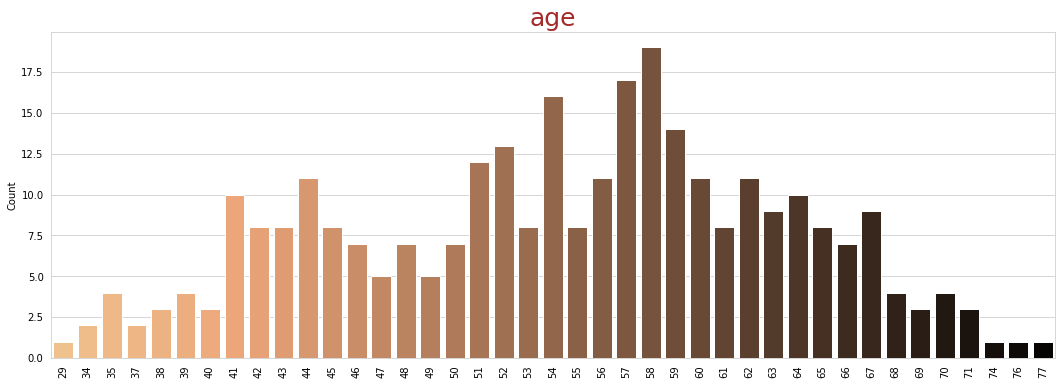




*************************************************************************************************************************************************




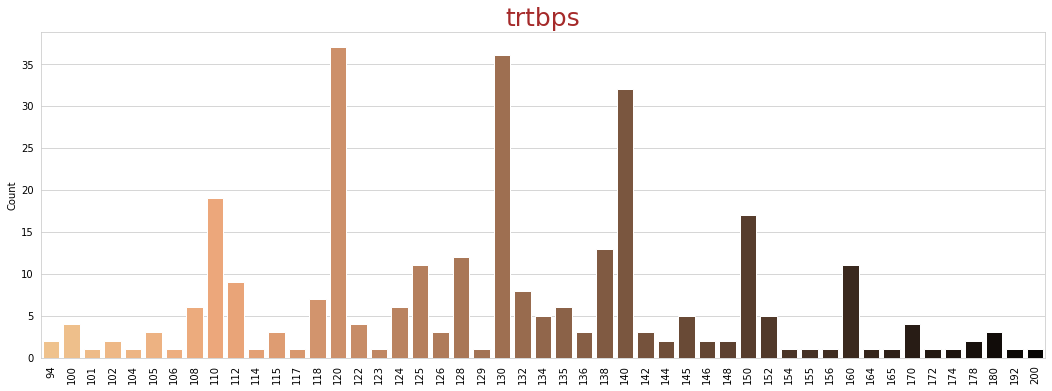




*************************************************************************************************************************************************




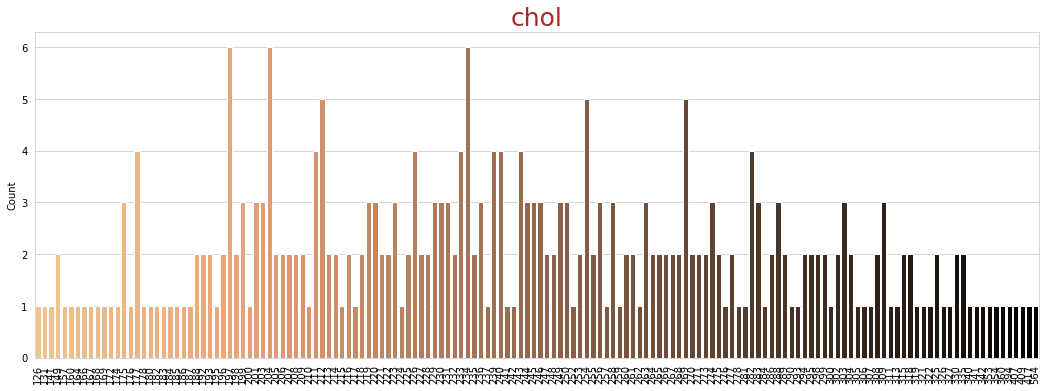




*************************************************************************************************************************************************




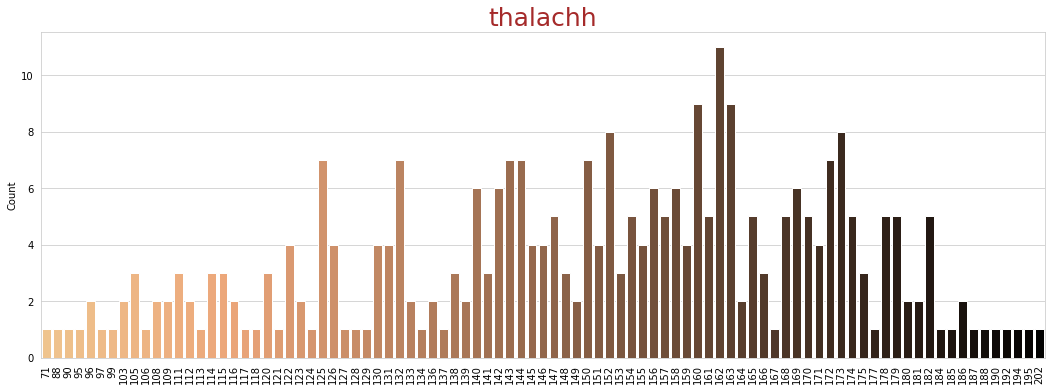




*************************************************************************************************************************************************




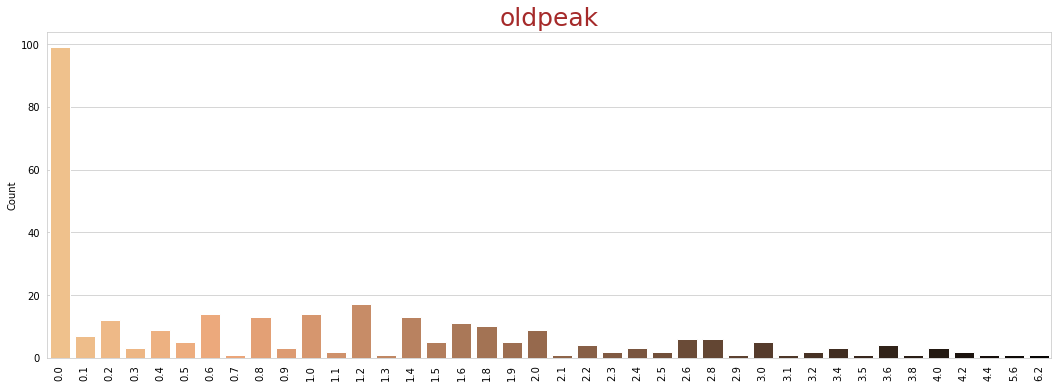

In [16]:
for col in con_cols :
  if col == "avg_glucose_level":
    continue
  print("*"*145)
  print('\n')
  fig=plt.subplots(figsize=(18,6))
  sns.set_style("whitegrid")
  sns.countplot(data[col] , palette='copper_r')
  plt.title(col , color='brown' , size=25)
  plt.xticks(rotation=90 , size=10, color='black')
  plt.yticks(color='black')
  plt.ylabel('Count',color='black')
  plt.xlabel(xlabel=None)

  plt.show()
  print("\n\n")

#####box plot(continus cols)(for finding outliers)

*********************************** age ***********************************




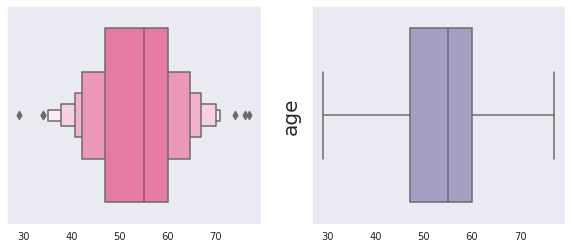




*********************************** trtbps ***********************************




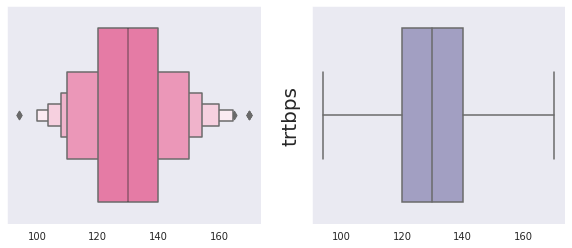




*********************************** chol ***********************************




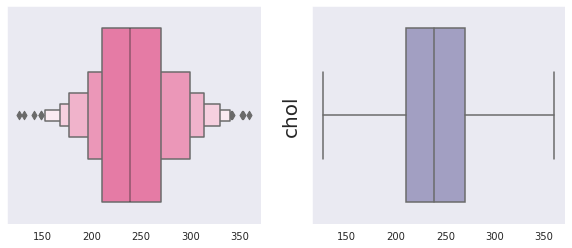




*********************************** thalachh ***********************************




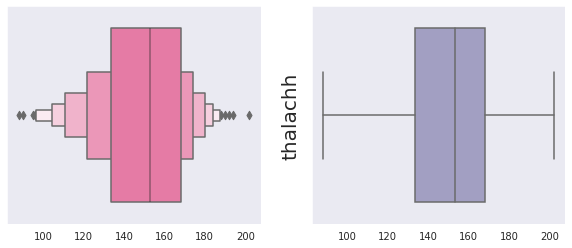




*********************************** oldpeak ***********************************




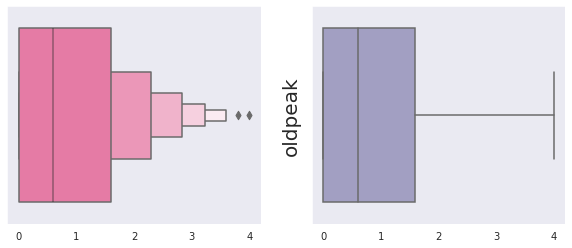

In [51]:
sns.set_style('dark')
for col in con_cols:
  print("*"*35,col,"*"*35)
  print('\n')
  fig,ax = plt.subplots(nrows=1 , ncols=2 , figsize=(10,4))
  sns.boxenplot(data[col] ,data=data ,palette="RdPu_r" , ax=ax[0])
  ax[0].set_xlabel(None)
  sns.boxplot(data[col] ,data=data, palette="Purples" , ax=ax[1])
  ax[1].set_xlabel(None)
  ax[1].set_ylabel(col , size=20)
  plt.show()
  print('\n\n')


boxplot(continus cols)(for coparastion target)

*************** age ***************




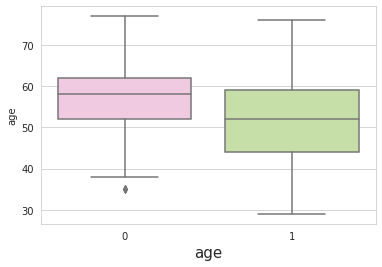




*************** trtbps ***************




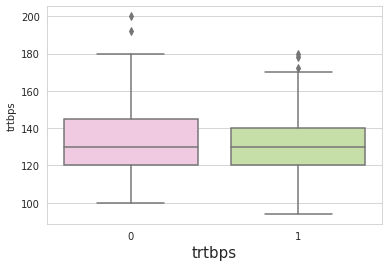




*************** chol ***************




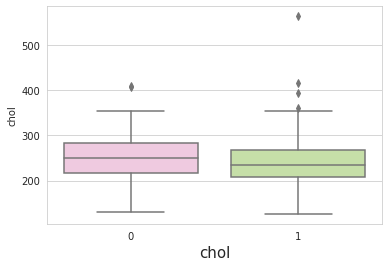




*************** thalachh ***************




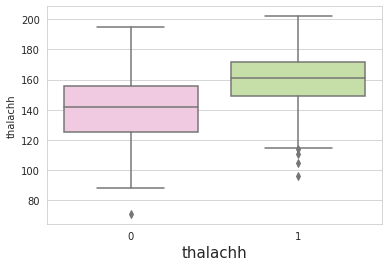




*************** oldpeak ***************




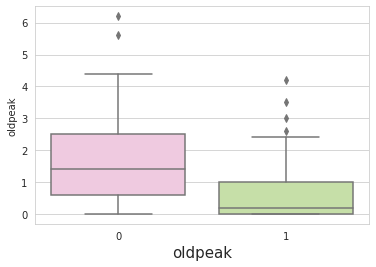

In [18]:
sns.set_style('whitegrid')

for col in con_cols:
  print("*"*15,col,"*"*15)
  print('\n')
  sns.boxplot(x='output' ,y=col ,data=data ,palette="PiYG")
  plt.xlabel(col , size=15)
  plt.show()
  print('\n\n')


#####distribution plot(for coparastion target)

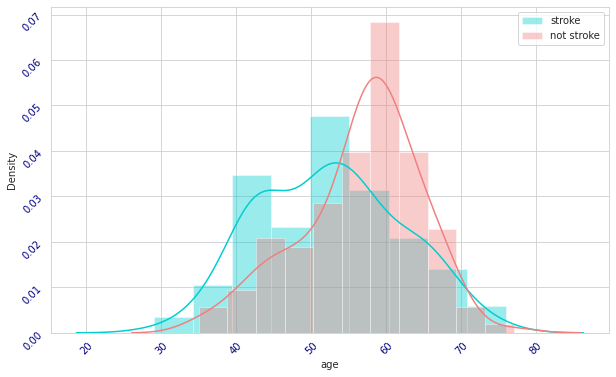

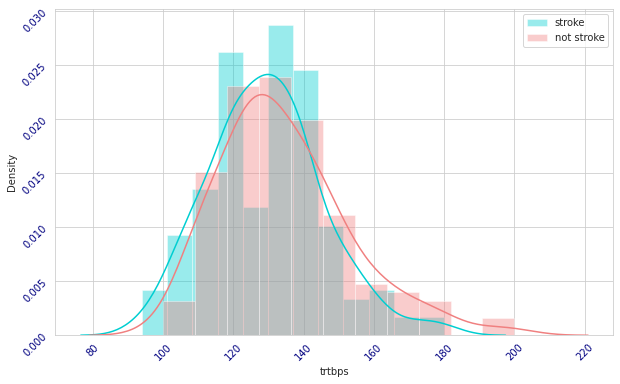

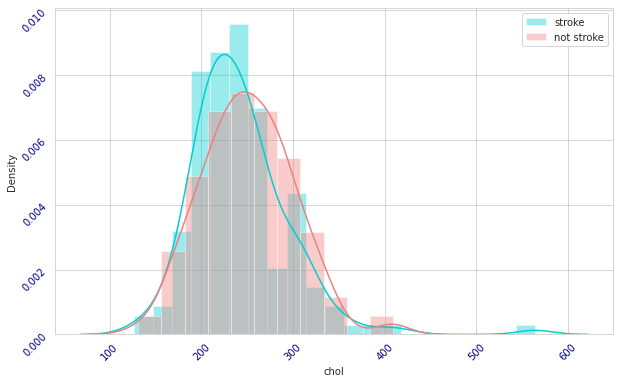

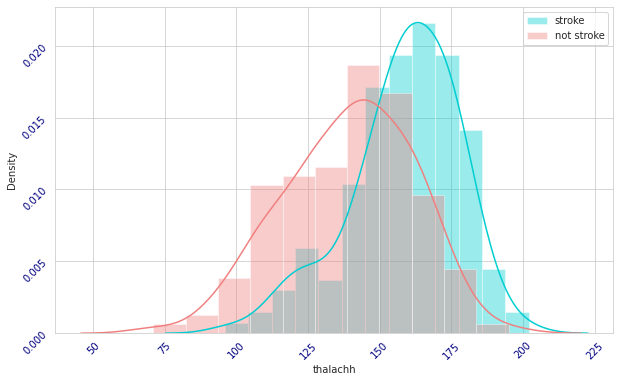

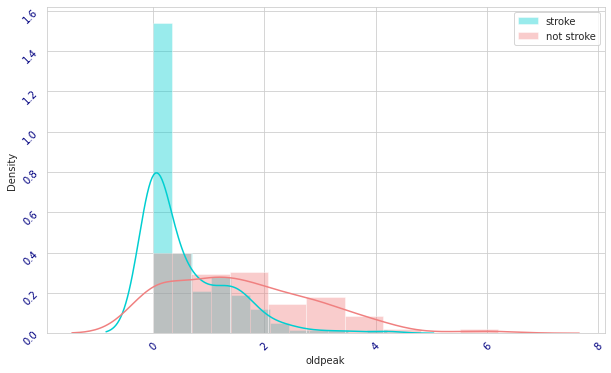




***********
✓
the plots illuminate relations between categorical values and heart attack
***********
in the next step we display the relation of them


In [19]:
for col in con_cols:
  plt.figure(figsize=(10,6))
  sns.distplot(data[col][data['output'] == 1] , color='darkturquoise' , label='stroke')
  sns.distplot(data[col][data['output'] == 0] , color='lightcoral' , label='not stroke')
  plt.xticks(color='navy' , rotation=45)
  plt.yticks(color='navy' , rotation=45)
  plt.legend()

  plt.show()
  print('\n\n')

print("***********")
print('\u2713\nthe plots illuminate relations between categorical values and heart attack')
print("***********")
print("in the next step we display the relation of them")

heatmap

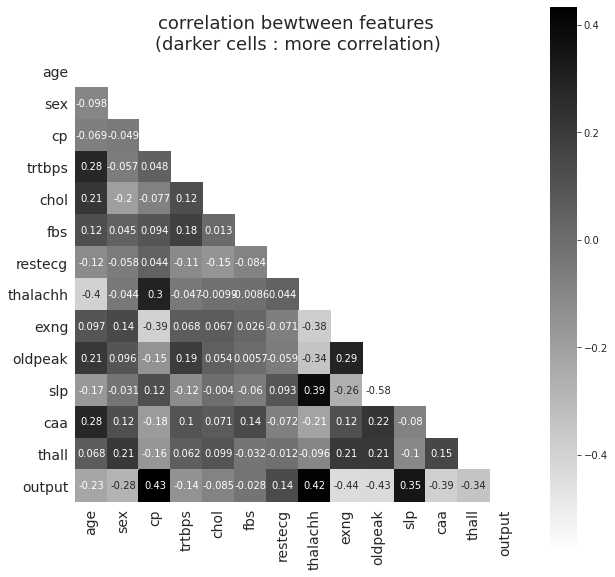

In [20]:

mask = np.triu(data.corr())
plt.figure(figsize=(10,10))
sns.heatmap(data.corr() , annot=True , square=True , mask=mask , cmap='binary')
plt.xticks(rotation=90,size=14)
plt.yticks(rotation=0 ,size=14)
plt.title("correlation bewtween features \n(darker cells : more correlation)" , size=18)
plt.show()

# ***preprocessing***

dupilacated

In [21]:
if data.duplicated().sum() > 0 :
  print(f"there are/is {data.duplicated().sum()} duplicate record in dataset")
  print("dropping duplicated...")
  data.drop_duplicates(keep='first' , inplace=True)
  print(f"there are/is {data.duplicated().sum()} duplicate record in dataset")
else :
  print("there isn't any dupliated value")


there are/is 1 duplicate record in dataset
dropping duplicated...
there are/is 0 duplicate record in dataset


###for outliers and nan values check below method for reachin the best accuracy :
##### - drop nan value
##### - fill nan with mean 
##### - drop outlier
##### - preserve outliers
##### - replace outliers with lower and upper boundries

##### missing value

In [22]:
data.isna().sum().sum()

0

In [23]:
if data.isna().sum().sum()>0:
  print(f"there are/is {data.isna().sum().sum()} nan value in dataset")
  print("dropping nan values ...")
  data.dropna(axis=0 , inplace=True)
  print(f"there is {data.isna().sum().sum()} nan value in dataset \u2713")\

else :
  print('there is not nan value in dataset')

there is not nan value in dataset


#####outliers

In [24]:
print("*"*50)
initialy_nan = data.isna().sum().sum()
print(f'there are {initialy_nan} nan value in dataset')
print("*"*50)
print("finding outliers ...")

def outlier_boundries(column):
  Q1 = np.percentile(data[column] , 25)
  Q3 = np.percentile(data[column] , 75)
  IQR = Q3-Q1
  upper_limit = Q3 + 1.5*IQR
  lower_limit = Q1 - 1.5*IQR


  return upper_limit,lower_limit


for col in con_cols :
  upper=outlier_boundries(column=col)[0]
  lower=outlier_boundries(column=col)[1]

  # treat with the outliers voluntary
  # upper outliers
  data[col] = np.where(data[col] > upper , np.nan , data[col])
  # lower outliers
  data[col] = np.where(data[col] < lower , np.nan  , data[col])
  print(f'finding {data[col].isna().sum()} outlier in {col}')

print("*"*50)
print(f"there are {data.isna().sum().sum() - initialy_nan} outlier in dataset ")
print("*"*50)
print(f'there are totaly {data.isna().sum().sum()} missing and outlier value in dataset')
print("*"*50)


**************************************************
there are 0 nan value in dataset
**************************************************
finding outliers ...
finding 0 outlier in age
finding 9 outlier in trtbps
finding 5 outlier in chol
finding 1 outlier in thalachh
finding 5 outlier in oldpeak
**************************************************
there are 20 outlier in dataset 
**************************************************
there are totaly 20 missing and outlier value in dataset
**************************************************


#####outlier checking

there are/is 20 nan value in dataset
dropping nan values ...
there is 0 nan value in dataset ✓
*********************************** age ***********************************




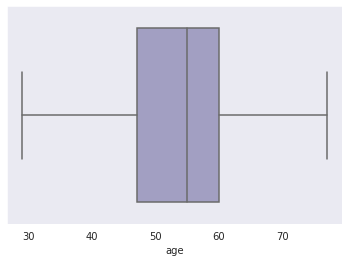




*********************************** trtbps ***********************************




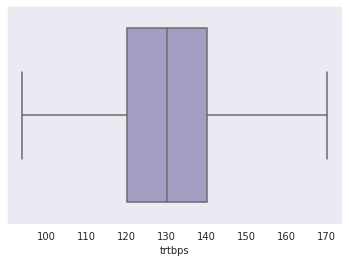




*********************************** chol ***********************************




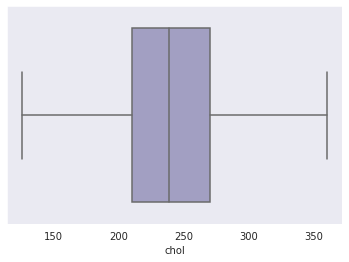




*********************************** thalachh ***********************************




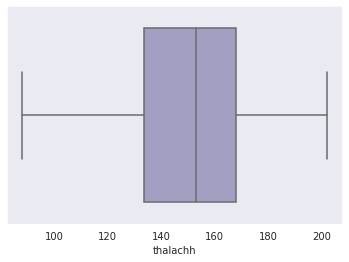




*********************************** oldpeak ***********************************




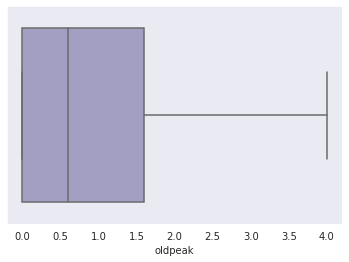

In [25]:
if data.isna().sum().sum()>0:
  print(f"there are/is {data.isna().sum().sum()} nan value in dataset")
  print("dropping nan values ...")
  data.dropna(axis=0 , inplace=True)
  print(f"there is {data.isna().sum().sum()} nan value in dataset \u2713")\

else :
  print('there is not nan value in dataset')

sns.set_style('dark')
for col in con_cols:
  print("*"*35,col,"*"*35)
  print('\n')
  sns.boxplot(data[col] ,data=data, palette="Purples")
  plt.show()
  print('\n\n')

##### categorical columns

In [26]:
# for cols with more than 2 category
final_df = pd.get_dummies(data , columns=['cp' , 'caa' , 'thall'] , drop_first=True) # drop_first=True,False
final_df

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,output,cp_1,cp_2,cp_3,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63.0,1,145.0,233.0,1,0,150.0,0,2.3,0,1,0,0,1,0,0,0,0,1,0,0
1,37.0,1,130.0,250.0,0,1,187.0,0,3.5,0,1,0,1,0,0,0,0,0,0,1,0
2,41.0,0,130.0,204.0,0,0,172.0,0,1.4,2,1,1,0,0,0,0,0,0,0,1,0
3,56.0,1,120.0,236.0,0,1,178.0,0,0.8,2,1,1,0,0,0,0,0,0,0,1,0
4,57.0,0,120.0,354.0,0,1,163.0,1,0.6,2,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,0,0,0,0,0,0,0,0,0,1
299,45.0,1,110.0,264.0,0,1,132.0,0,1.2,1,0,0,0,1,0,0,0,0,0,0,1
300,68.0,1,144.0,193.0,1,1,141.0,0,3.4,1,0,0,0,0,0,1,0,0,0,0,1
301,57.0,1,130.0,131.0,0,1,115.0,1,1.2,1,0,0,0,0,1,0,0,0,0,0,1


##### featues and target

In [27]:
y = final_df['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 283, dtype: int64

In [28]:
x = final_df.drop(columns=['output'])
x

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,cp_1,cp_2,cp_3,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63.0,1,145.0,233.0,1,0,150.0,0,2.3,0,0,0,1,0,0,0,0,1,0,0
1,37.0,1,130.0,250.0,0,1,187.0,0,3.5,0,0,1,0,0,0,0,0,0,1,0
2,41.0,0,130.0,204.0,0,0,172.0,0,1.4,2,1,0,0,0,0,0,0,0,1,0
3,56.0,1,120.0,236.0,0,1,178.0,0,0.8,2,1,0,0,0,0,0,0,0,1,0
4,57.0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,0,0,0,0,0,0,0,0,1
299,45.0,1,110.0,264.0,0,1,132.0,0,1.2,1,0,0,1,0,0,0,0,0,0,1
300,68.0,1,144.0,193.0,1,1,141.0,0,3.4,1,0,0,0,0,1,0,0,0,0,1
301,57.0,1,130.0,131.0,0,1,115.0,1,1.2,1,0,0,0,1,0,0,0,0,0,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer

from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

#####spliting

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x , y  , test_size=0.3 , stratify=y, random_state=42)


print(f"shape x_train : {x_train.shape}")
print(f"shape y_train : {y_train.shape}")
print(f"shape x_test : {x_test.shape}")
print(f"shape y_test : {y_test.shape}")



shape x_train : (198, 20)
shape y_train : (198,)
shape x_test : (85, 20)
shape y_test : (85,)


#####encoding label

#####scaling features

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#***model construction***

#####baseline accuracy

In [32]:
# lr = LogisticRegression()
# lr.fit(x_train , y_train)
# y_pred = lr.predict(x_test)
# acc = accuracy_score(y_test , y_pred)
# print(f"baseline accuracy : {acc}")

# baseline accuracy : 0.8352941176470589

#####models

In [33]:
svc = SVC(random_state=42)
linear_svc = LinearSVC(random_state=42)
knn = KNeighborsClassifier()
adaboost = AdaBoostClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
nb_gaussian = GaussianNB()
nb_bernoli = BernoulliNB()
nb_multinomial = MultinomialNB()
decision_tree = DecisionTreeClassifier(random_state=42)
lda = LinearDiscriminantAnalysis()
lr = LogisticRegression()
sgd = SGDClassifier(random_state=42)

#####models params

In [34]:
# use the main document : """https://scikit-learn.org/stable/modules/classes.html#

params_svc = {'kernel' : ['rbf'] , 'C' : [0.1 , 1 ,10,100,1000] , 'gamma' : [0.1 , 0.01 , 0.001]} #, 'poly', 'rbf', 'sigmoid', 'precomputed'
params_linear_svc ={'penalty' : ['l1' , 'l2'] , 'C' : [0.1 , 1 ,10,100,1000] }
params_knn = {'n_neighbors' :[2,4,6,8,10,12,14,16,18] , 'metric' : ['minkowski' , "euclidean","manhattan"] ,  "weights": ["uniform","distance"] , "leaf_size": [1,3,5,12,30]}
params_adaboost = {'n_estimators' :[10,20,30,40,50]}
params_random_forest = {'n_estimators' :[60,80,100,120,140] , 'criterion' : ['gini' , 'entropy'] , 'min_samples_leaf' : [1,3,10] , 'max_features' : [1,3,10] , 'min_samples_split' : [2,3,10]}
params_nb_gaussian = {}
params_nb_bernoli = {}
params_decision_tree = {'criterion' : ['gini' , 'entropy'] , 'max_depth' : range(1,20,2) , 'min_samples_split' : range(10,500,50)}
params_lda ={'solver' : ['svd', 'lsqr', 'eigen']}
params_lr = {'penalty': ['l1' , 'l2' , 'None']  , 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
params_sgd = {'penalty' : ['l2', 'l1', 'elasticnet'] , 'alpha' : [0.1 , 0.01 , 0.001 , 0.0001]}

models lists

In [35]:
models = [sgd,linear_svc,knn,adaboost ,random_forest,decision_tree,lda ,lr,svc,nb_gaussian,nb_bernoli]
models_name = ['sgd','linear svc','knn','adaboost' ,'random forest','decision tree','lda' ,'lr','svc','bayes guasi','bayes bernoli' ]
models_params = [params_sgd,params_linear_svc,params_knn,params_adaboost ,params_random_forest,
                params_decision_tree,params_lda,params_lr,params_svc,params_nb_gaussian,params_nb_bernoli]


#####fitting models

In [70]:
def calculation(model , xtrain , xtest , ytrain , ytest) :

  model.fit(xtrain , ytrain)
  y_pred_test = model.predict(xtest)
  y_pred_train = model.predict(xtrain)


  accuracy_score_train = accuracy_score(ytrain ,y_pred_train)
  accuracy_score_test = accuracy_score(ytest , y_pred_test)
  roc_score = roc_auc_score(ytest , y_pred_test)
  choosen_estimatore = model.best_estimator_
  mse_error = mean_squared_error(ytest , y_pred_test)
  clf_report = classification_report(ytest , y_pred_test)
  conf_matrix = confusion_matrix(ytest , y_pred_test)



  print("----------------------------")
  print(f'train accuracy score : {accuracy_score_train}')
  print("----------------------------") 
  print(f'acuuracy score test : {accuracy_score_test}')
  print("----------------------------")
  print(f'roc auc score : {roc_score}')
  print("----------------------------")
  print(f'mean square error : {mse_error}')
  print("----------------------------")
  print(f'best estimator :\n{choosen_estimatore}')
  print("----------------------------")
  print(f'classification  report :\n{clf_report}')




  acc_train.append(accuracy_score_train)
  acc_test.append(accuracy_score_test)
  acc_roc.append(roc_score)
  mse.append(mse_error)
  best_estimators.append(choosen_estimatore)
  clfs.append(clf_report)



  sns.set_style("dark")
  fig_score , ax_score = plt.subplots(nrows=1 , ncols=2 , figsize=(12,6))
  ax_score[0].set_title('confusion matrix')
  plot_confusion_matrix(ax=ax_score[0] , estimator=model , X=xtest , y_true=ytest  , cmap='autumn' )
  fpr , tpr , thresh = roc_curve(ytrain ,y_pred_train)
  ax_score[1].plot(fpr , tpr ,  color='darkturquoise' , label = 'train')
  fpr , tpr , thresh = roc_curve(ytest , y_pred_test )
  ax_score[1].plot(fpr , tpr , color='lightcoral' , label = 'test')

  ax_score[1].legend(loc='lower right')
  ax_score[1].set_title('roc curve')
  ax_score[1].plot([0,1] , [0,1] , color='black' , linestyle='--' )

  fig_score.suptitle(models_name[i] , size = 20)

  plt.show()
  print('\n\n')


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV

acc_train = []
acc_test = []
acc_roc = []
mse = []
best_estimators = []
clfs  = []



for i in range(len(models)):
# for (model,name,param) in zip(models , models_name , models_params):
  clf = GridSearchCV(estimator=models[i] ,
                     param_grid=models_params[i] ,
                     cv=StratifiedKFold(n_splits=10),
                     scoring='accuracy',
                     n_jobs=-1,
                     )
  
  print('*********************************************************************************************')
  print(f'**************************************{models_name[i]}******************************************')
  print('*********************************************************************************************')


  calculation(model=clf , xtrain=x_train , xtest=x_test , ytrain=y_train , ytest=y_test)



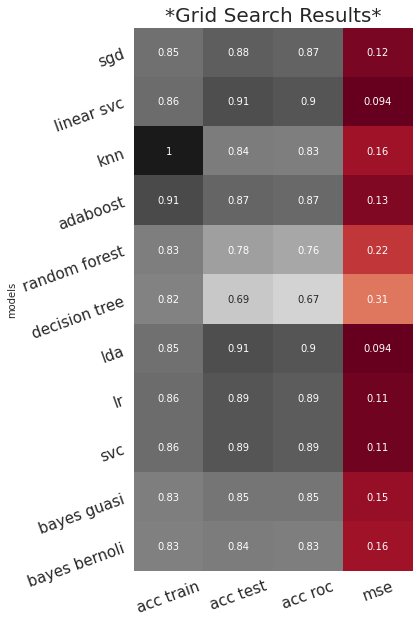

In [73]:

result_df = pd.DataFrame({'models' : models_name ,'acc train' : acc_train,'acc test' : acc_test,'acc roc' : acc_roc,'mse' : mse})

result_df.index = result_df['models']
result_df = result_df.drop(['models'] , axis=1)


f , ax = plt.subplots(figsize=(5,10))

sns.heatmap(result_df,
            cmap='RdGy' , 
            annot=True ,
            annot_kws={'size' : 10},
            cbar=False)
plt.title("*Grid Search Results*" , size = 20)
plt.xticks(size=15 ,rotation=20 )
plt.yticks(size=15 ,rotation=20 )
plt.show()

#####comparation

In [74]:
sort_cv = result_df.reset_index().sort_values('acc test' , ascending=False)[:4]
print(sort_cv)

       models  acc train  acc test   acc roc       mse
1  linear svc   0.858586  0.905882  0.897256  0.094118
6         lda   0.853535  0.905882  0.897256  0.094118
7          lr   0.858586  0.894118  0.886618  0.105882
8         svc   0.858586  0.894118  0.886618  0.105882


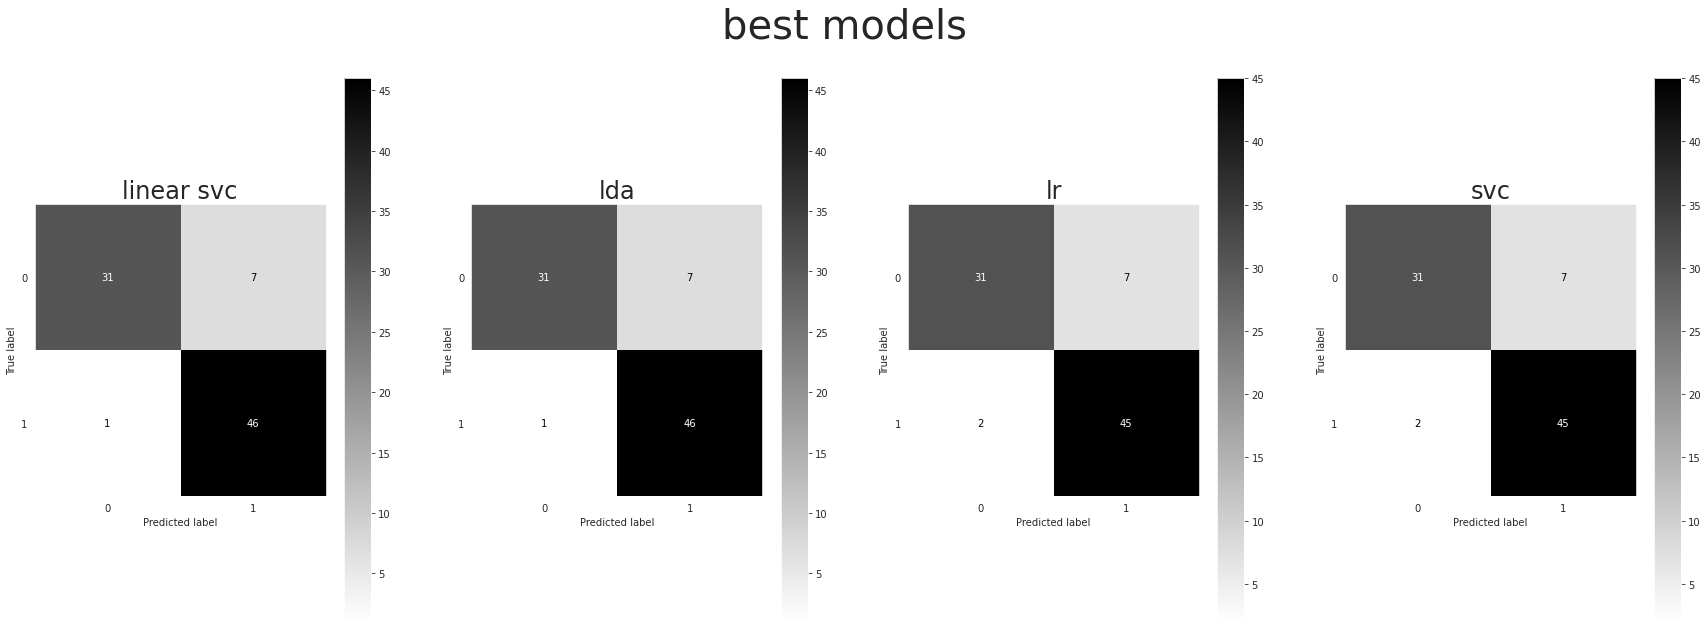

In [80]:
ff ,axx = plt.subplots(nrows=1 , ncols=4 , figsize=(30,10))
ff.suptitle('best models' , size=40)

for (i,index) in enumerate((1,6,7,8)):
  plot_confusion_matrix(best_estimators[index] , X=x_test , y_true=y_test ,ax=axx[i] , cmap='gray_r' , )
  axx[i].set_title(label=models_name[index] ,size=24 )

plt.show()